In [2]:
#Python and machine learning

# 课题简介
医疗健康疾病预测
1.该数据集最初来自国家糖尿病/消化/肾脏疾病研究所。数据集的目标是基于数据集中包含的某些诊断测量来诊断性的预测患者是否患有糖尿病。

2.从较大的数据库中选择这些实例有几个约束条件。尤其是，这里的所有患者都是Pima印第安至少21岁的女性。

3.数据集由多个医学预测变量和一个目标变量组成Outcome。预测变量包括患者的怀孕次数、BMI、胰岛素水平、年龄等。

数据文件：diabetes.csv

特征（怀孕次数，血糖，血压，皮脂厚度，胰岛素，BMI身体质量指数，糖尿病遗传函数，年龄，结果）

In [3]:
import pandas as pd# 数据科学计算工具
import numpy as np# 数值计算工具
import matplotlib.pyplot as plt # 可视化
%matplotlib inline
data=pd.read_csv("diabetes.csv")
print(data.columns)
data.shape

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


(768, 9)

In [4]:
#打印前五行数据
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


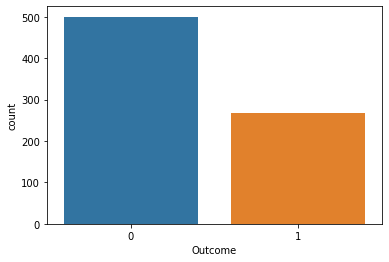

In [6]:
import seaborn as sns
sns.countplot(data['Outcome'],label="Count")

In [7]:
from sklearn.model_selection import train_test_split
train_X , test_X , train_y , test_y = train_test_split(data[data.columns[0:8]], data['Outcome'], test_size=0.20, random_state=2)
print(test_y)

158    0
251    0
631    0
757    1
689    1
      ..
733    0
441    0
627    0
84     1
55     0
Name: Outcome, Length: 154, dtype: int64


# KNN算法介绍
KNN是一种有监督的机器学习算法，可以解决分类问题，也可以解决回归问题。

算法流程 对每一个未知点执行：

计算未知点到所有已知类别点的距离
按距离排序（升序）
选取其中前k个与未知点离得最近的点
统计k个点中各个类别的个数
上述k个点里类别出现频率最高的作为未知点的类别
优点： 简单有效、易理解

缺点： k近邻需要保存全部数据集，因此对内存消耗大，当数据集较大时对设备要求非常高； 需要计算每个未知点到全部已知点的距离，可能会很耗时； 分类结果不易理解!


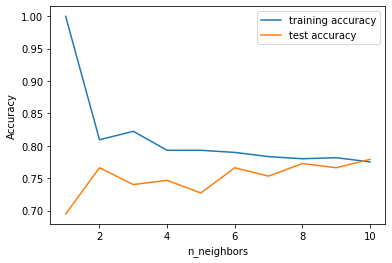

In [8]:
#算法会在训练数据集中找到与其相距最近的数据点——也就是它的“近邻点”。下面研究是否能够确认模型的复杂度和精确度之间的关系
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
#try n_neighbors from 1 to 10
neighbors_settings=range(1,11)
 
for n_neighbors in neighbors_settings:
    #build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_X,train_y)
    #record training set accuracy
    training_accuracy.append(knn.score(train_X,train_y))
    #record test set accuracy
    test_accuracy.append(knn.score(test_X, test_y))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [9]:
#图中建议我们应该选择n_neighbors=9，下面给出：
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(train_X, train_y)
print('Accuracy of K-NN classifier on training set:{:.2f}'.format(knn.score(train_X, train_y)))
print('Accuracy of K-NN classifier on test set:{:.2f}'.format(knn.score(test_X, test_y)))

Accuracy of K-NN classifier on training set:0.78
Accuracy of K-NN classifier on test set:0.77


# 逻辑斯蒂回归
LR回归是在线性回归模型的基础上，使用sigmoid函数，将线性模型的结果压缩到[0,1]之间，使其拥有概率意义。

In [10]:
#使用逻辑斯蒂回归对模型进行学习训练。
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(train_X, train_y)
log_y_predict = log.predict(test_X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
from sklearn.metrics import classification_report
print("Accuracy on training set:{:.3f}".format(log.score(train_X,train_y)))
print("Accuracy on test set:{:.3f}".format(log.score(test_X,test_y)))

Accuracy on training set:0.775
Accuracy on test set:0.760


# 决策树
   决策树是一个预测模型；他代表的是对象属性与对象值之间的一种映射关系。树中每个节点表示某个对象，而每个分叉路径则代表的某个可能的属性值，而每个叶结点则对应从根节点到该叶节点所经历的路径所表示的对象的值。决策树是描述非线性关系的不二选择。

In [12]:
#决策树
'''默认值对树的深度没有限制,训练集的准确度可以高达100%，而测试集的准确度相对就差了很多。
这表明决策树是过度拟合的，不能对新数据产生好的效果。因此，我们需要对树进行预剪枝。'''
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=1)
tree.fit(train_X,train_y)
print("Accuracy on training set:{:.3f}".format(tree.score(train_X,train_y)))
print("Accuracy on test set:{:.3f}".format(tree.score(test_X,test_y)))

Accuracy on training set:1.000
Accuracy on test set:0.727


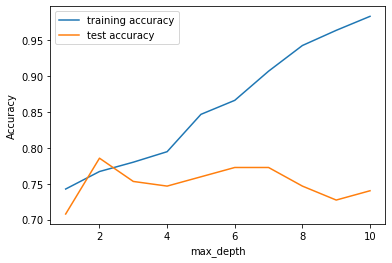

In [13]:
#限制树的深度，观察训练集和测试集的准确率变化
from sklearn.tree import DecisionTreeClassifier
training_accuracy=[]
test_accuracy=[]
max_depth_settings=range(1,11)
for max_depth in max_depth_settings :
    tree=DecisionTreeClassifier(max_depth=max_depth,random_state=1)
    tree.fit(train_X,train_y)
    training_accuracy.append(tree.score(train_X,train_y))
    test_accuracy.append(tree.score(test_X, test_y))
    tree_y_predict = tree.predict(test_X)
plt.plot(max_depth_settings,training_accuracy,label="training accuracy")
plt.plot(max_depth_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
plt.savefig('tree_compare_model')

In [14]:
#我们设置max_depth=2或者3比较合适，限制树的深度以减少过拟合。这会使训练集的准确度降低，但测试集准确度提高。
tree=DecisionTreeClassifier(max_depth=2,random_state=1)
tree.fit(train_X,train_y)
tree_y_predict = tree.predict(test_X)
print("Accuracy on training set:{:.3f}".format(tree.score(train_X,train_y)))
print("Accuracy on test set:{:.3f}".format(tree.score(test_X,test_y)))

Accuracy on training set:0.767
Accuracy on test set:0.786


In [15]:
#打印特征重要性
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.71675591 0.         0.         0.         0.14041827
 0.         0.14282582]


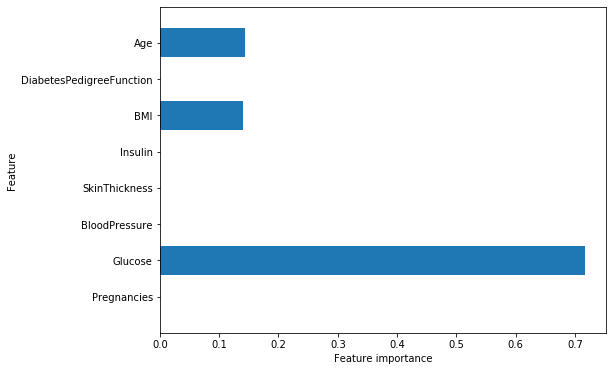

In [16]:
#画出特征重要性的可视图，易看出血糖是影响糖尿病的重要因素
a=[]
for i in data.columns:
    a.append(i)
data=pd.read_csv("diabetes.csv")
def plot_feature_importances_data(model):
    plt.figure(figsize=(8,6))
    n_features=8
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),a)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
plot_feature_importances_data(tree)

# 随机森林
   随机森林是利用多个决策树对样本进行训练、分类并预测的一种算法，主要应用于回归和分类场景。在对数据进行分类的同时，还可以给出各个变量的重要性评分，评估各个变量在分类中所起的作用。随机森林中随机是核心，通过随机的选择样本、特征，降低了决策树之间的相关性。随机森林中的随机主要有两层意思，一是随机在原始训练数据中有放回的选取等量的数据作为训练样本，二是在建立决策树时，随机的选特征中选取一部分特征建立决策树。这两种随机使得各个决策树之间的相关性小，进一步提高模型的准确性。

In [17]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(train_X,train_y)
rf_y_predict = rf.predict(test_X)
print("Accuracy on training set:{:.3f}".format(rf.score(train_X,train_y)))
print("Accuracy on test set:{:.3f}".format(rf.score(test_X,test_y)))

Accuracy on training set:1.000
Accuracy on test set:0.766


In [18]:
# check scikit-learn version
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.21.3


<function matplotlib.pyplot.show(*args, **kw)>

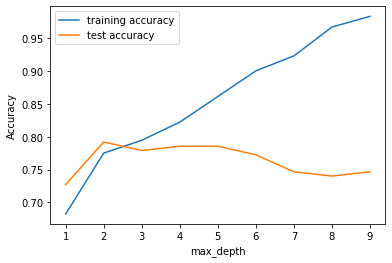

In [19]:
#调整树的深度，观察训练集和测试集深度变化
from sklearn.ensemble import RandomForestClassifier
training_accuracy=[]
test_accuracy=[]
max_depth_settings=range(1,10)
for max_depth in max_depth_settings :
    rf=RandomForestClassifier(max_depth=max_depth,random_state=1,n_estimators=100)
    rf.fit(train_X,train_y)
    training_accuracy.append(rf.score(train_X,train_y))
    test_accuracy.append(rf.score(test_X, test_y))
plt.plot(max_depth_settings,training_accuracy,label="training accuracy")
plt.plot(max_depth_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
plt.show

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=2,n_estimators=100,random_state=1)
rf.fit(train_X,train_y)
rf_y_predict = rf.predict(test_X)
print("Accuracy on training set:{:.3f}".format(rf.score(train_X,train_y)))
print("Accuracy on test set:{:.3f}".format(rf.score(test_X,test_y)))

Accuracy on training set:0.775
Accuracy on test set:0.792


# 梯度提升
   梯度提升的思想借鉴于梯度下降法，其基本原理是根据当前模型损失函数的负梯度信息来训练新加入的弱分类器，然后将训练好的弱分类器以累加的形式结合到现有模型中。

In [21]:
#梯度提升
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=0)
gb.fit(train_X,train_y)
print("Accuracy on training set:{:.3f}".format(gb.score(train_X,train_y)))
print("Accuracy on test set:{:.3f}".format(gb.score(test_X,test_y)))

Accuracy on training set:0.925
Accuracy on test set:0.734


<function matplotlib.pyplot.show(*args, **kw)>

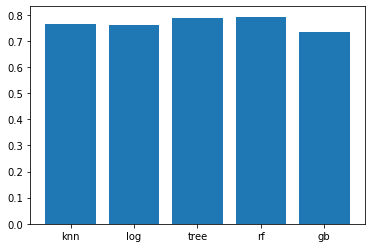

In [25]:
#默认状态下随机森林的测试集的准确率最高
plt.bar(['knn', 'log', 'tree', 'rf', 'gb'], (knn.score(test_X, test_y),log.score(test_X, test_y),tree.score(test_X, test_y),rf.score(test_X, test_y),gb.score(test_X, test_y)))
plt.show